In [21]:
import numpy as np
import pandas as pd

import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt 

In [22]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

# Median Values of Homes, Box plot

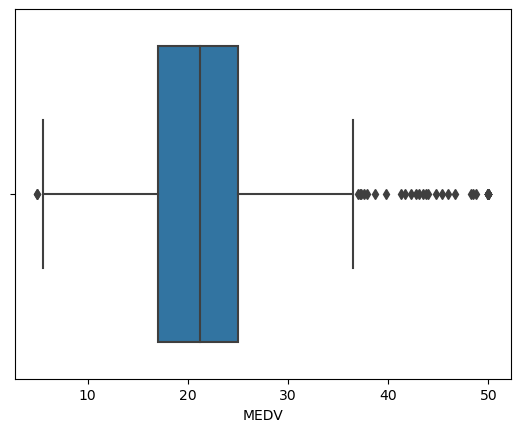

In [23]:
ax = sns.boxplot(x='MEDV', data = boston_df)

# Bar plot for the Charles river variable

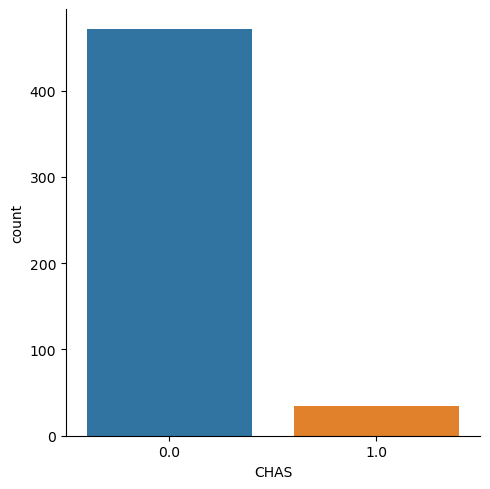

In [24]:
sns.catplot(x='CHAS', kind='count', data = boston_df)


# Boxplot for the MEDV variable vs the AGE variable. (Discretized by the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

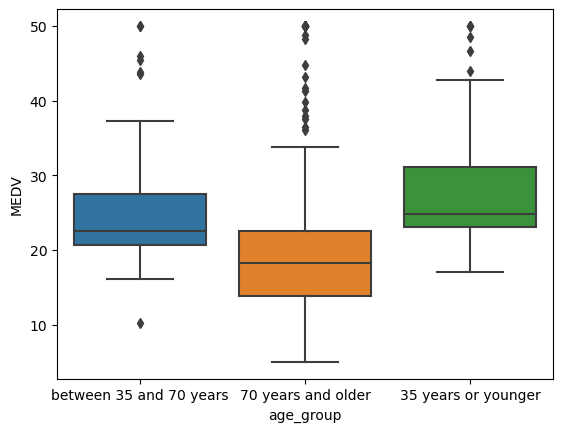

In [25]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years or younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

ax = sns.boxplot(x="age_group", y="MEDV", data=boston_df)

# scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 

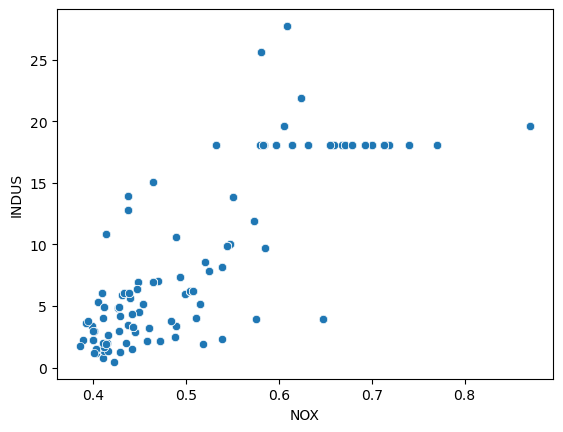

In [26]:
ax = sns.scatterplot(x='NOX', y='INDUS',  data=boston_df)

# Histogram for the pupil to teacher ratio variable

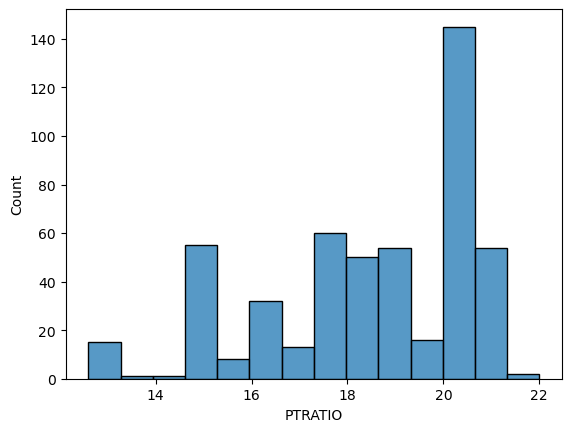

In [27]:
ax = sns.histplot(boston_df['PTRATIO'], kde = False)

# Is there a significant difference in median value of houses bounded by the Charles river or not?

### Hypothesis:
1.H0: u1 = u2 or no difference in median value of houses bounded by the Charles river \n


2.)H1: u1 does not equal u2 or there is a difference in median value of houses bounded by the Charles river 

In [28]:

import scipy.stats

In [29]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

since pvalue is less than 0.05, equality of variance cannot be assumed.

In [30]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

p-value is less than 0.05 we can reject the null hypothesis. our math suggests there is a statistical difference in Median value of owner-occupied homes based on provided data.

# Is there a difference in Median values of houses for each proportion of owner occupied units built prior to 1940?

Hypothesis:
 Hypothesis 1: the means of our 3 age groups are equal.
 Hypothesis 2: the means of 1 or more of our age groups differ.
 


In [42]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE', data = boston_df).fit()
table = sm.stats.anova_lm(lm)
print(table)


             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


Given p-value is less than 0.05, we fail to accept the Null Hypothesis --> There is statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

H1: Nitric Oxide concentration is not correlated with the proportion of non-retail business acres per town

H2: Nitric Oxide concentration is correlated with the proportion of non-retail business acres per town

In [43]:

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

the Pearson Coefficient is 0.76365 and p-value less than 0.05, we reject the Null Hypothesis

# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [45]:
x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predisction = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 01 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        18:19:38   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""